# **PREDIKSI DENGAN MENGGUNAKAN LOAD MODEL**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import librosa
import librosa.display as libdisplay
import numpy as np
from sklearn.preprocessing import LabelEncoder

import IPython.display as ipd
import matplotlib.pyplot as plt



new_model = tf.keras.models.load_model('/content/drive/My Drive/SOUND/set_a/LOAD_MODEL_27122019/my_model_BAGUS_SOUND.h5')


max_pad_len = 388

num_rows = 40
num_columns = 388
num_channels = 1


dic = {
    '1':'The predicted class is artifact',
    '2':'The predicted class is extrahls',
    '3':'The predicted class is murmur',
    '4':'The predicted class is normal'
}


def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

def sound_image(file_name):
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        plt.figure(figsize=(12,4))
        _ = librosa.display.waveplot(audio,sr=sample_rate)
  
        plt.suptitle(file_name)
        ipd.Audio(file_name)     

def LOAD_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = new_model.predict_classes(prediction_feature)
    pv = str(predicted_vector).replace('[','').replace(']','')
    print(dic[pv]+'\n')

    

    #predicted_class = le.inverse_transform(predicted_vector) 
    #print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = new_model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        #category = le.inverse_transform(np.array([i]))
        category = np.array(['artifact','extrahls','murmur','normal'])
        print(category[i], "\t\t : ", format(predicted_proba[i], '.32f') )

    sound_image(file_name)    

    
   

In [58]:
ls

'My Drive'/


The predicted class is artifact

artifact 		 :  0.00000000133553634817928923439467
extrahls 		 :  0.99998700618743896484375000000000
murmur 		 :  0.00001295470156037481501698493958
normal 		 :  0.00000000006963418730521198085626


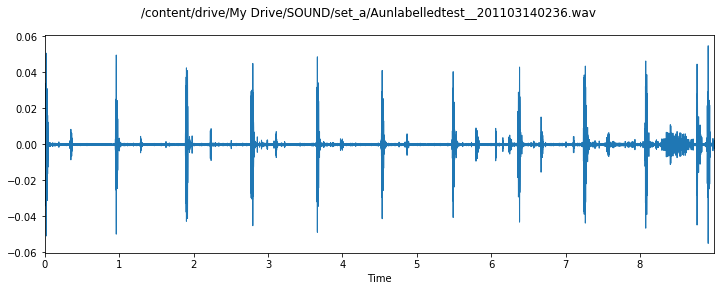

In [59]:
filename = '/content/drive/My Drive/SOUND/set_a/Aunlabelledtest__201103140236.wav' 
#filename = '/content/drive/My Drive/SOUND/set_a/Aunlabelledtest__201012172010.wav'
LOAD_prediction(filename)



The predicted class is artifact

artifact 		 :  0.00000000000784856641483644423829
extrahls 		 :  0.92838180065155029296875000000000
murmur 		 :  0.07085649669170379638671875000000
normal 		 :  0.00076170463580638170242309570312


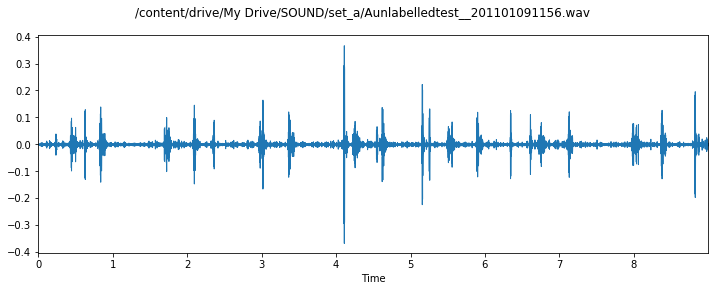

In [61]:
filename = '/content/drive/My Drive/SOUND/set_a/Aunlabelledtest__201101091156.wav'
LOAD_prediction(filename)

The predicted class is extrahls

artifact 		 :  0.00000000116026477314790099626407
extrahls 		 :  0.00000000000000000000000000000000
murmur 		 :  0.99999976158142089843750000000000
normal 		 :  0.00000023871359644545009359717369


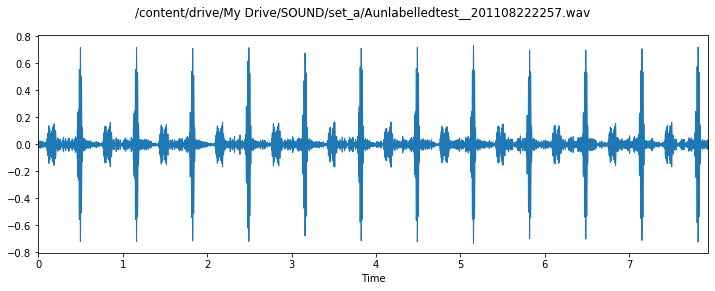

In [62]:
filename = '/content/drive/My Drive/SOUND/set_a/Aunlabelledtest__201108222257.wav'
LOAD_prediction(filename)

The predicted class is murmur

artifact 		 :  0.00000103238039628195110708475113
extrahls 		 :  0.00000000000000000000004535227293
murmur 		 :  0.01965840160846710205078125000000
normal 		 :  0.98034060001373291015625000000000


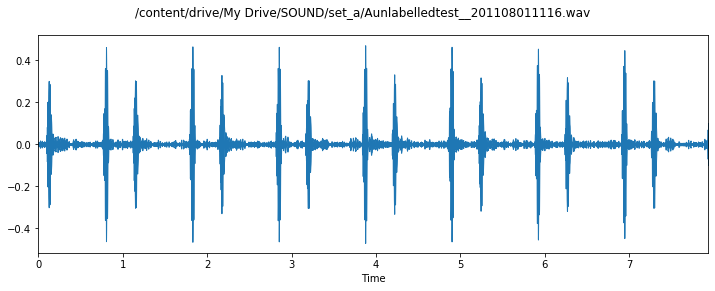

In [63]:
filename = '/content/drive/My Drive/SOUND/set_a/Aunlabelledtest__201108011116.wav'
LOAD_prediction(filename)

EXPLOR BUAT TULSAN DI MEDIUM


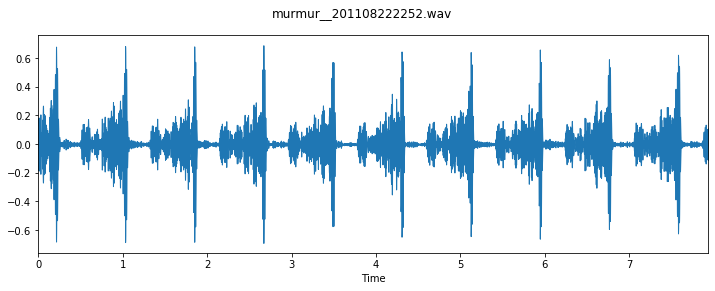

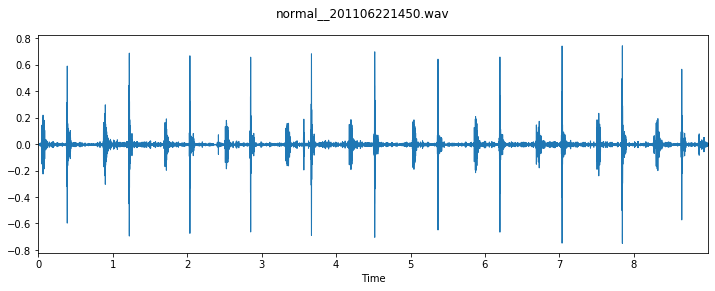

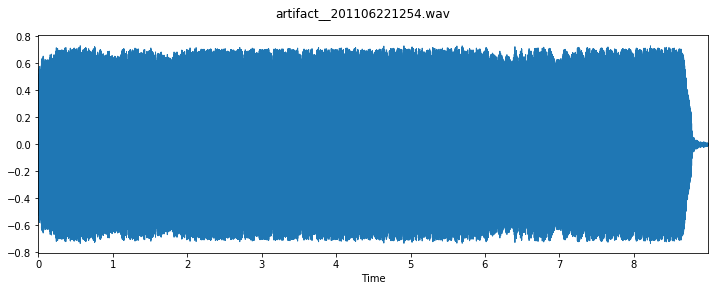

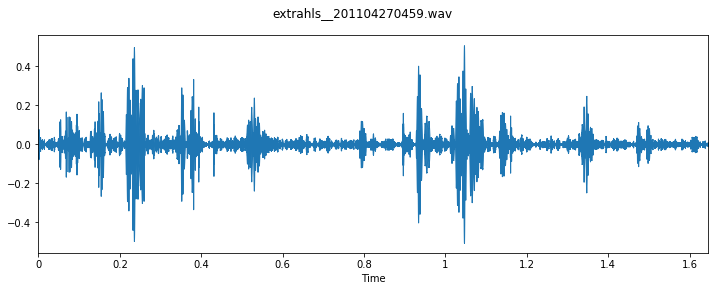

In [0]:
import librosa
import librosa.display as libdisplay

import IPython.display as ipd
import matplotlib.pyplot as plt


file = ['murmur__201108222252.wav','normal__201106221450.wav','artifact__201106221254.wav','extrahls__201104270459.wav']

for file_name in file:
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  plt.figure(figsize=(12,4))
  _ = librosa.display.waveplot(audio,sr=sample_rate)
  #ipd.Audio(file_name)
  plt.suptitle(file_name)
  ipd.Audio(file_name)


for file_name in file:
  ipd.Audio(file_name)






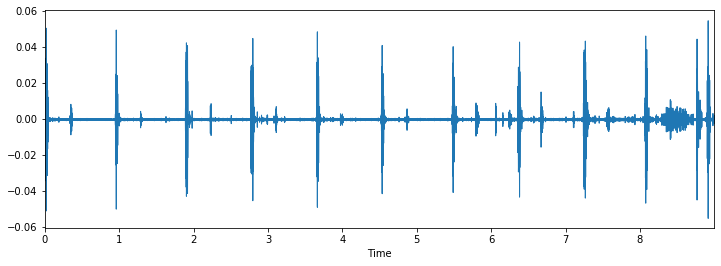

In [0]:


file = ['murmur__201108222252.wav']

#file_name = 'murmur__201108222252.wav'
file_name = filename
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
plt.figure(figsize=(12,4))
_ = librosa.display.waveplot(audio,sr=sample_rate)
ipd.Audio(file_name)
#plt.suptitle(file_name)
